Automatically created module for IPython interactive environment


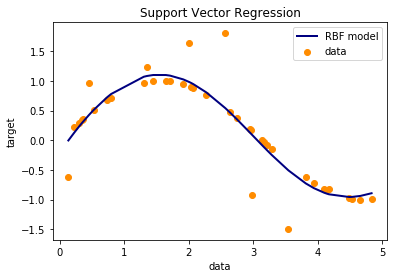

In [4]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X, y).predict(X)


# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Automatically created module for IPython interactive environment


C:\Users\MOREAU Simon\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


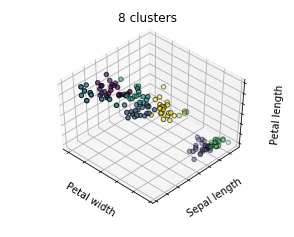

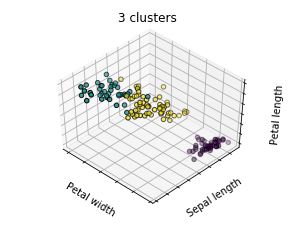

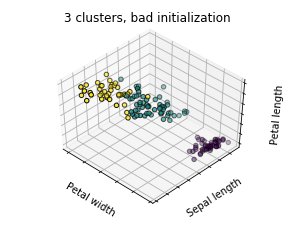

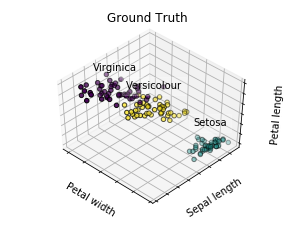

In [2]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

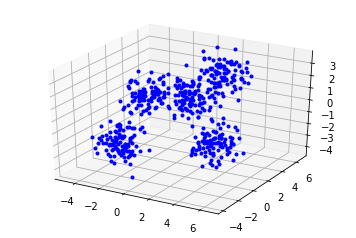

Epoch: 50; Error: 11.866448209607501;
Epoch: 100; Error: 9.895919175157735;
The maximum number of train epochs is reached


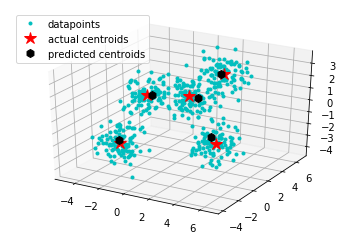

In [3]:
import numpy as np
centroids = np.array([[1, 2, 1], [2, 5, 2], [-3, 3, 0], [5, -1, -1], [-2, -2, -2]])
num_centroids = len(centroids)
dimensionality = len(centroids[0])
num_datapoints = 100

gaussian_distribution = 0.8 * np.random.randn(num_datapoints, num_centroids, dimensionality)
input_datapoints = np.array([centroids + x for x in gaussian_distribution])
input_datapoints.shape = (num_datapoints * num_centroids, dimensionality)
np.random.shuffle(input_datapoints)
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(input_datapoints[:,0], input_datapoints[:,1], input_datapoints[:,2], 'b.')
pl.show()
normalization_factor = np.linalg.norm(input_datapoints)
input_datapoints_norm = input_datapoints / normalization_factor
import neurolab as nl
neural_net = nl.net.newc([[0, 1] for _ in range(dimensionality)], num_centroids)
error = neural_net.train(input_datapoints_norm, epochs=100, show=50)
predicted_centroids = neural_net.layers[0].np['w']
predicted_centroids = predicted_centroids * normalization_factor
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(input_datapoints[:,0], input_datapoints[:,1], input_datapoints[:,2], 'c.')
ax.plot(centroids[:,0], centroids[:,1], centroids[:,2], 'r*', markersize=12)
ax.plot(predicted_centroids[:,0], predicted_centroids[:,1], predicted_centroids[:,2], 'kh', markersize=8)
pl.legend(['datapoints', 'actual centroids', 'predicted centroids'])
pl.show()